Problema de negócio: Uma grande multinacional varejista do ramo de supermercados deseja ingressar no mercado brasileiro

    - Dizer ao cliente o porque ele deve entrar nesse mercado utilizando esses grupos.
    - Depois da realização da separação por grupos, como ainda vão ter muitos disponíveis, aplicar novamente a metodologia de análise para ter um número satisfatório.

- Realize uma classificação dos municípios brasileiros com base nas informações disponíveis e faça uma caracterização dos municípios em grupos.
    - Separar os munícipos em grupos: 


- Elabore uma forma de classificar um novo município entre os grupos já criados na etapa anterior!


- Responda em sua apresentação quais grupos de municípios deveriam ser a porta de entrada para empresa no país e porque!

Métricas de clusterização:

    - WSS (within sum square)
    - SS ( Silhoute Score ) 

# 0.0 Imports

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import express as px

from IPython.core.display import HTML

from sklearn import cluster as c
from sklearn import metrics as m
from yellowbrick.cluster import KElbowVisualizer

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
  %matplotlib inline
  %pylab inline
  plt.style.use( 'bmh' )
  plt.rcParams['figure.figsize'] = [25, 12]
  plt.rcParams['font.size'] = 24
  display( HTML( '<style>.container { width:100% !important; }</style>') )
  pd.options.display.max_columns = None
  pd.options.display.max_rows = None
  pd.set_option( 'display.expand_frame_repr', False )
  sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0 Descrição dos Dados

In [4]:
df = pd.read_excel('case_plusoft.xls')
df.head()

,Código,Município,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000","Intensidade da indigência, 2000","Intensidade da pobreza, 2000","Índice de Desenvolvimento Humano Municipal, 2000","Taxa bruta de freqüência à escola, 2000","Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000"
0,520005,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,34.40,0.742,80.17,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875
1,310010,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,35.22,0.760,74.57,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519
2,520010,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,40.32,0.723,74.18,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246
3,150010,Abaetetuba (PA),1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,0.59,44.61,51.04,0.706,81.76,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309
4,310020,Abaeté (MG),1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,0.58,41.53,31.68,0.778,78.39,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338


In [5]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 5507
Number of Cols: 25


In [6]:
df.dtypes

Código                                                                     int64
Município                                                                 object
Área (km²)                                                               float64
Densidade demográfica, 2000                                              float64
Distância à capital (km)                                                 float64
Esperança de vida ao nascer, 2000                                        float64
Mortalidade até um ano de idade, 2000                                    float64
Taxa de fecundidade total, 2000                                          float64
Percentual de pessoas de 25 anos ou mais analfabetas, 2000               float64
Renda per Capita, 2000                                                   float64
Índice de Gini, 2000                                                     float64
Intensidade da indigência, 2000                                          float64
Intensidade da pobreza, 2000

In [7]:
# verificação na tabela de dados NAN
df.isna().sum()

Código                                                                   0
Município                                                                0
Área (km²)                                                               0
Densidade demográfica, 2000                                              0
Distância à capital (km)                                                 0
Esperança de vida ao nascer, 2000                                        0
Mortalidade até um ano de idade, 2000                                    0
Taxa de fecundidade total, 2000                                          0
Percentual de pessoas de 25 anos ou mais analfabetas, 2000               0
Renda per Capita, 2000                                                   0
Índice de Gini, 2000                                                     0
Intensidade da indigência, 2000                                          0
Intensidade da pobreza, 2000                                             0
Índice de Desenvolvimento

## 1.1 Estatística Descritiva

- Na primeira rodada, não realizo a estatistica descritiva

In [8]:
df1 = df.copy()

In [9]:
df1 = df1.select_dtypes(exclude = ['object'])
df1.head()

,Código,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000","Intensidade da indigência, 2000","Intensidade da pobreza, 2000","Índice de Desenvolvimento Humano Municipal, 2000","Taxa bruta de freqüência à escola, 2000","Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000"
0,520005,136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,34.40,0.742,80.17,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875
1,310010,897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,35.22,0.760,74.57,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519
2,520010,1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,40.32,0.723,74.18,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246
3,150010,1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,0.59,44.61,51.04,0.706,81.76,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309
4,310020,1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,0.58,41.53,31.68,0.778,78.39,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338


In [10]:
df1.columns

Index(['Código', 'Área (km²)', 'Densidade demográfica, 2000',
       'Distância à capital (km)', 'Esperança de vida ao nascer, 2000',
       'Mortalidade até um ano de idade, 2000',
       'Taxa de fecundidade total, 2000',
       'Percentual de pessoas de 25 anos ou mais analfabetas, 2000',
       'Renda per Capita, 2000', 'Índice de Gini, 2000',
       'Intensidade da indigência, 2000', 'Intensidade da pobreza, 2000',
       'Índice de Desenvolvimento Humano Municipal, 2000',
       'Taxa bruta de freqüência à escola, 2000',
       'Taxa de alfabetização, 2000',
       'Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000',
       'População de 25 anos ou mais de idade, 1991',
       'População de 25 anos ou mais de idade, 2000',
       'População de 65 anos ou mais de idade, 1991',
       'População de 65 anos ou mais de idade, 2000', 'População total, 1991',
       'População total, 2000', 'População urbana, 2000',
       'População rural, 2000'],
      dtype='obje

In [11]:
# tendência central: Média e Mediana
ct1 = pd.DataFrame(df1.apply(np.mean)).T
ct2 = pd.DataFrame(df1.apply(np.median) ).T

In [12]:
# dispersão: std, min, max, range, skew, kurtosis

d1 = pd.DataFrame(df1.apply(np.std) ).T
d2 = pd.DataFrame(df1.apply(min ) ).T
d3 = pd.DataFrame(df1.apply(max ) ).T
d4 = pd.DataFrame(df1.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(df1.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(df1.apply(lambda x: x.kurtosis() )).T

In [13]:
m = pd.concat( [d2, d3, d4, ct1,ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std',
             'skew', 'kurtosis']


In [14]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,Código,110001.000,5.300100e+05,4.200090e+05,324164.517342,314467.000000,97968.737752,0.129664,-0.499624
1,Área (km²),2.900,1.614459e+05,1.614430e+05,1549.211476,417.200000,5737.871432,13.305744,245.030933
2,"Densidade demográfica, 2000",0.100,1.288140e+04,1.288130e+04,96.731869,23.600000,523.958606,14.274164,248.908543
3,Distância à capital (km),0.000,1.474315e+03,1.474315e+03,253.212620,228.262939,163.195712,0.968773,1.999172
4,"Esperança de vida ao nascer, 2000",54.350,7.818000e+01,2.383000e+01,67.748925,68.240000,4.860474,-0.374163,-0.533854
5,"Mortalidade até um ano de idade, 2000",5.380,1.096700e+02,1.042900e+02,34.083376,29.510000,18.468874,0.720459,-0.318752
6,"Taxa de fecundidade total, 2000",1.560,7.790000e+00,6.230000e+00,2.864845,2.670000,0.744387,1.469955,3.167648
7,Percentual de pessoas de 25 anos ou mais analf...,2.020,7.026000e+01,6.824000e+01,26.668411,22.600000,15.163085,0.471196,-0.950870
8,"Renda per Capita, 2000",28.380,9.546500e+02,9.262700e+02,170.814160,159.100000,96.416592,1.145258,2.779040
9,"Índice de Gini, 2000",0.360,8.200000e-01,4.600000e-01,0.560734,0.560000,0.058658,0.357894,0.588589


# 2.0 Feature Engineering


## 2.1 Criação das features

In [15]:
df2 = df1.copy()

In [16]:
##### features populacionais ######

#df2['pop_0_24_1991'] = df2['População total, 1991'] - df2['População de 25 anos ou mais de idade, 1991']

#df2['pop_0_24_2000'] = df2['População total, 2000'] - df2['População de 25 anos ou mais de idade, 2000']

#df2['pop_urb_2000'] = 

#df2['pop_rur_2000'] = 

df2['cresc_popu_1991_2000'] = ( df2['População total, 2000'] - df2['População total, 1991']) / df2['População total, 1991']


#### features financeiras

df2['receita_pop_2000']  = df2['População total, 2000'] * df2['Renda per Capita, 2000']

#df2['maior_rcp_pop'] = 

#### features de alfabetização




In [17]:
df2['receita_pop_2000']

0       1.020397e+06
1       1.265737e+06
2       1.927486e+06
3       1.217019e+07
4       5.672285e+06
5       6.017076e+05
6       9.258314e+05
7       1.090202e+06
8       1.229930e+06
9       4.631752e+05
10      1.160245e+06
11      3.896609e+06
12      2.155435e+06
13      1.153945e+07
14      2.304141e+05
15      5.296818e+05
16      1.149770e+06
17      1.025757e+06
18      3.946821e+06
19      4.263907e+06
20      1.492389e+06
21      2.037697e+05
22      4.244215e+06
23      7.232276e+05
24      1.083445e+06
25      4.574518e+06
26      1.312612e+07
27      6.767398e+06
28      1.039640e+06
29      1.189077e+07
30      4.053096e+05
31      8.768657e+05
32      8.100092e+05
33      1.227255e+06
34      4.630809e+06
35      1.004871e+06
36      5.922630e+06
37      2.295540e+05
38      1.068697e+06
39      2.213465e+06
40      2.164689e+06
41      3.560712e+05
42      1.667435e+06
43      1.137981e+06
44      8.687443e+06
45      7.001111e+05
46      4.846032e+06
47      8.651

# 3.0 Filtragem das Variáveis

In [18]:
df3 = df2.copy()

# 4.0 Análise Exploratória dos Dados (EDA)

In [19]:
df4 = df3.copy()
print( 'Number of Cols: {}'.format( df4.shape[1] ) )

Number of Cols: 26


## 4.1 Análise Univariada


D:\Anaconda\envs\case_plusoft\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda per Capita, 2000', ylabel='Density'>

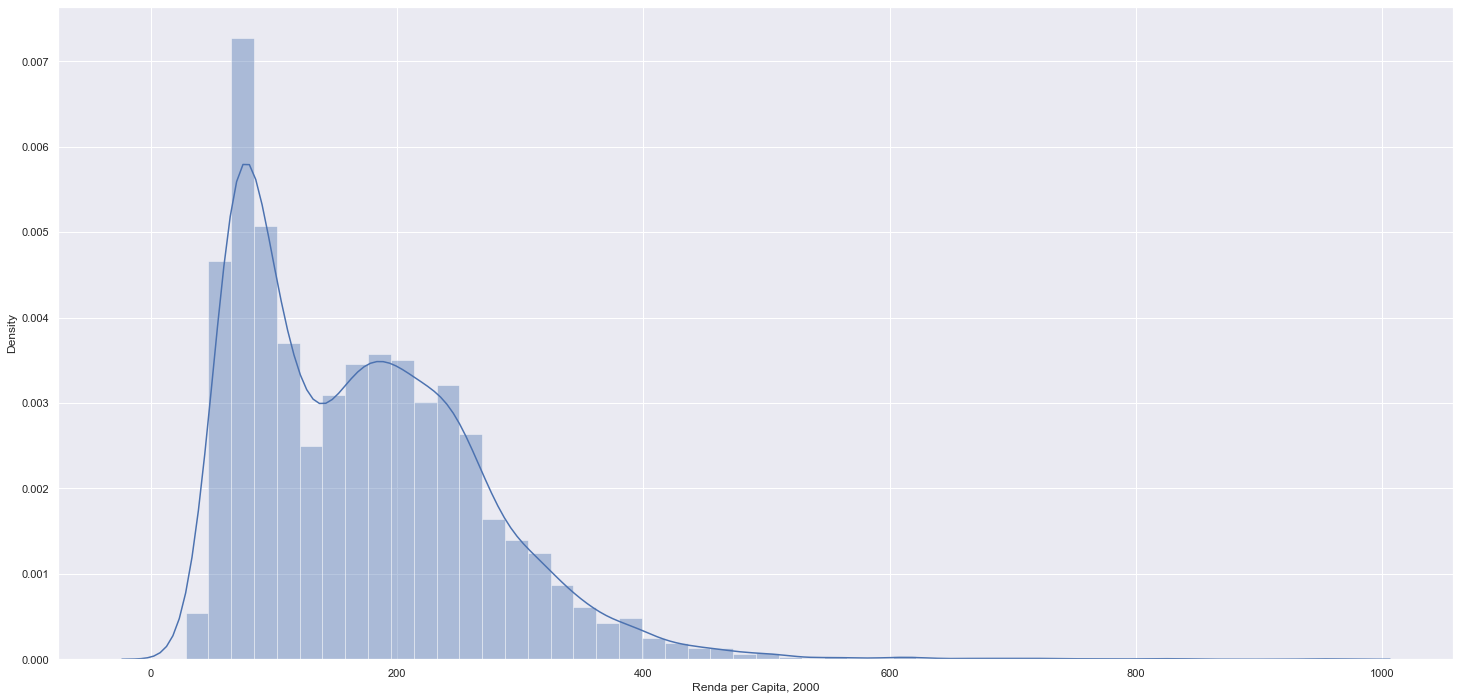

In [20]:
sns.distplot( df4['Renda per Capita, 2000'])

In [21]:
df4.dtypes

Código                                                                     int64
Área (km²)                                                               float64
Densidade demográfica, 2000                                              float64
Distância à capital (km)                                                 float64
Esperança de vida ao nascer, 2000                                        float64
Mortalidade até um ano de idade, 2000                                    float64
Taxa de fecundidade total, 2000                                          float64
Percentual de pessoas de 25 anos ou mais analfabetas, 2000               float64
Renda per Capita, 2000                                                   float64
Índice de Gini, 2000                                                     float64
Intensidade da indigência, 2000                                          float64
Intensidade da pobreza, 2000                                             float64
Índice de Desenvolvimento Hu

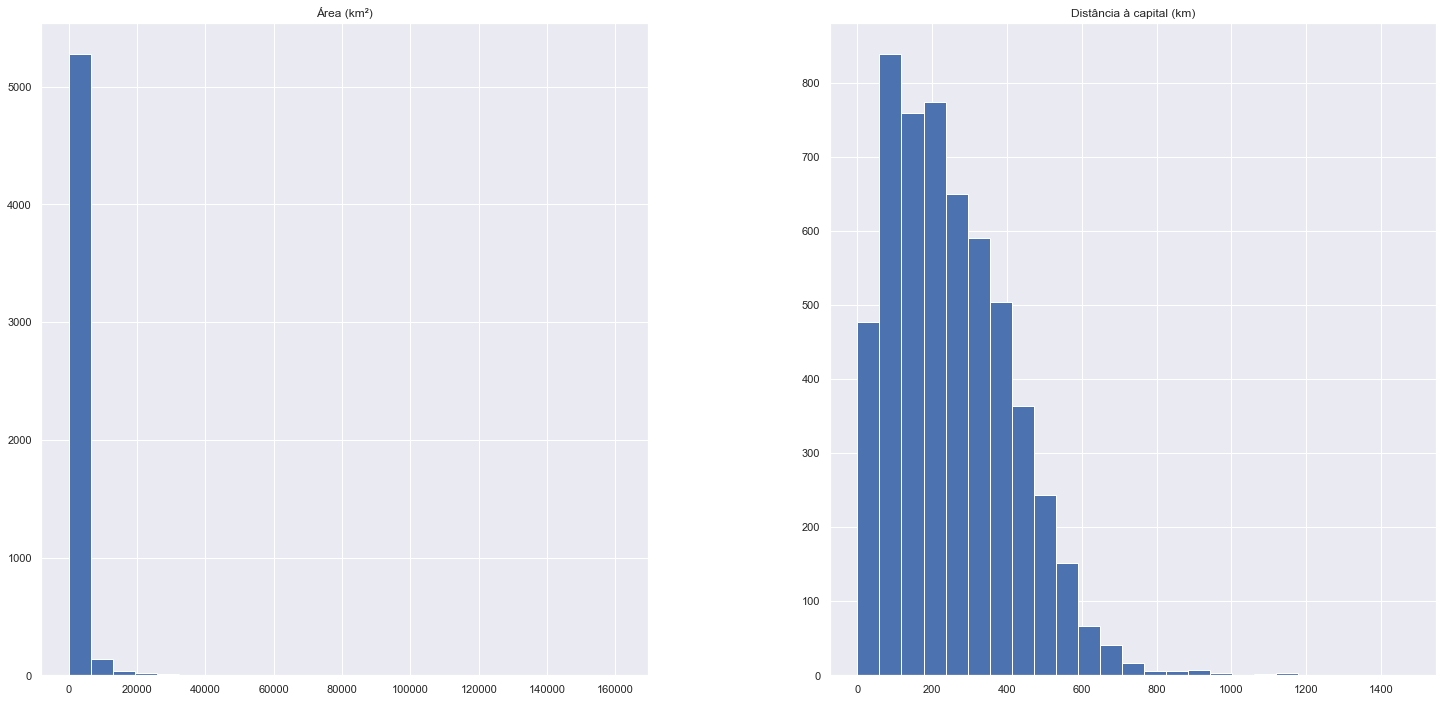

In [22]:
#features de área
df4['Área (km²)']
df4['Distância à capital (km)']

df4[['Área (km²)','Distância à capital (km)']].hist(bins = 25);

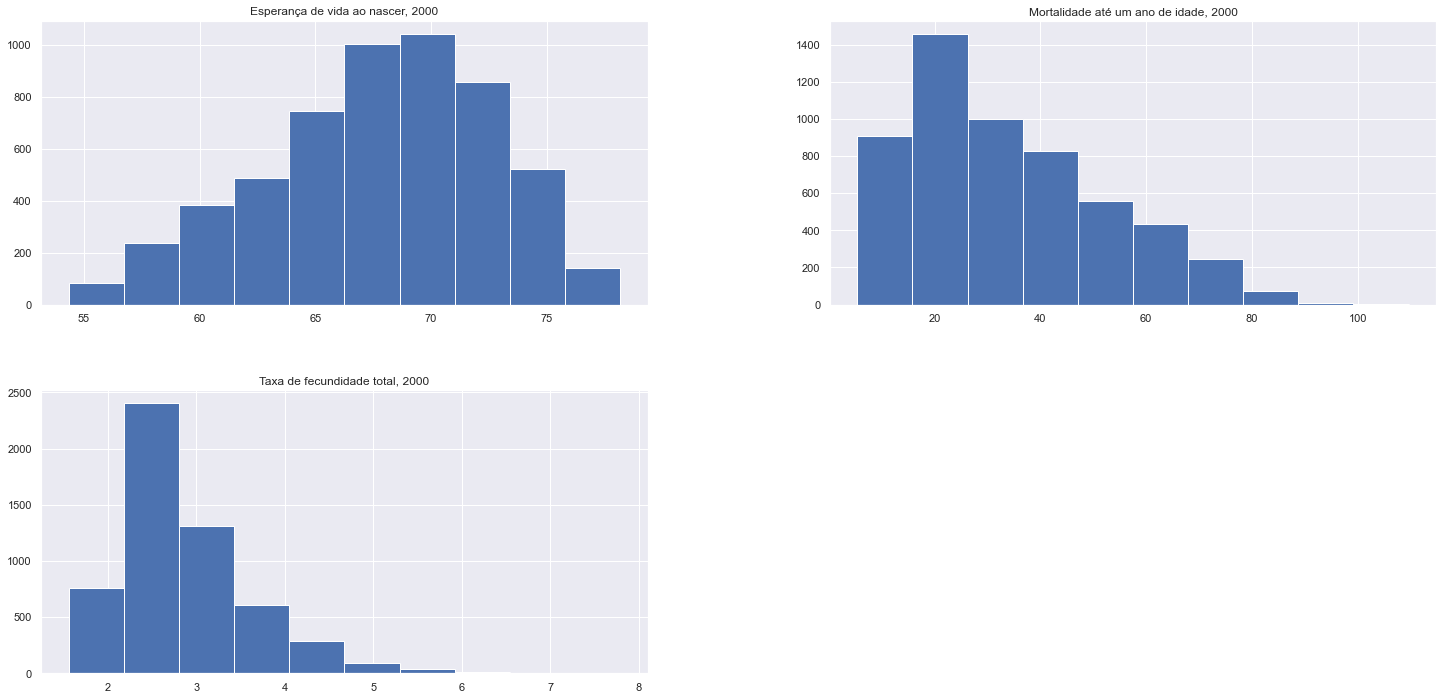

In [23]:
#features de natalidade
df4['Esperança de vida ao nascer, 2000']
df4['Mortalidade até um ano de idade, 2000']
df4['Taxa de fecundidade total, 2000']

df4[['Esperança de vida ao nascer, 2000','Mortalidade até um ano de idade, 2000',
     'Taxa de fecundidade total, 2000'  ]].hist();

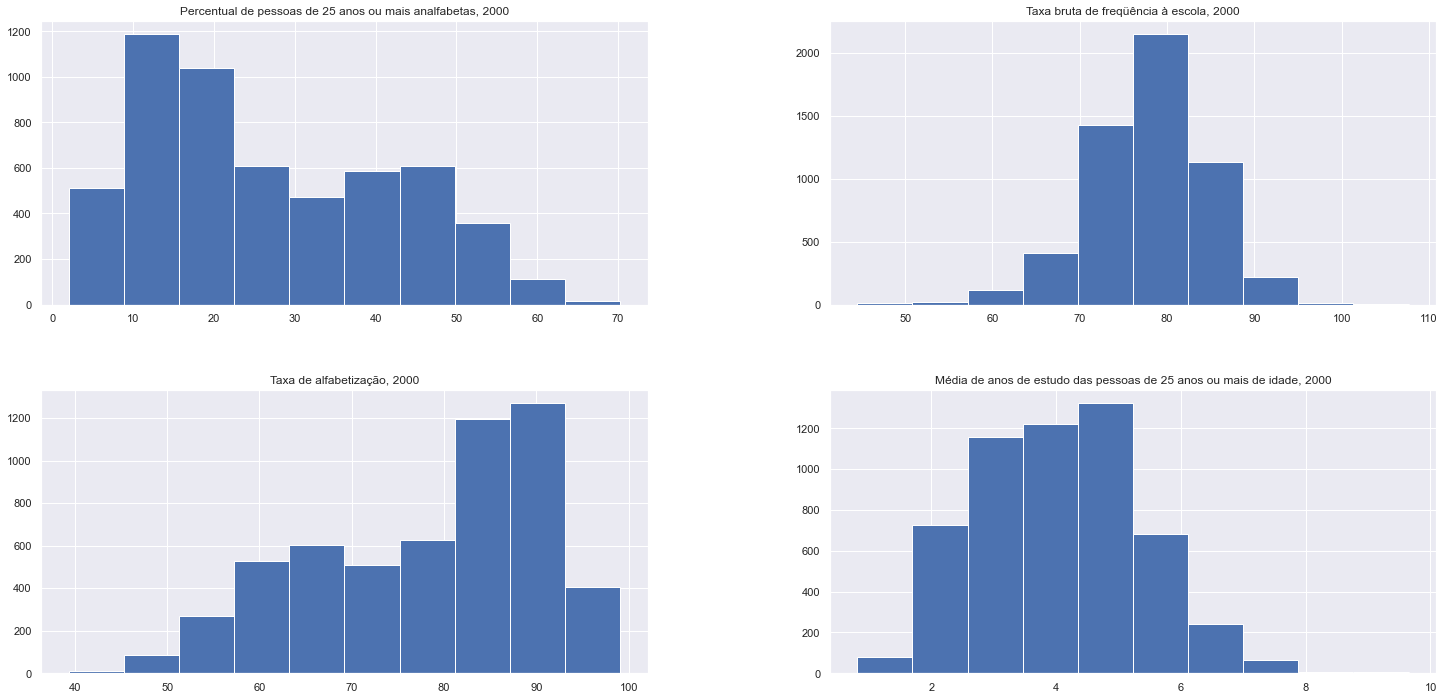

In [24]:
#features de alfabetização
df4['Percentual de pessoas de 25 anos ou mais analfabetas, 2000']
df4['Taxa bruta de freqüência à escola, 2000']
df4['Taxa de alfabetização, 2000']
df4['Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000']

df4[['Percentual de pessoas de 25 anos ou mais analfabetas, 2000',
     'Taxa bruta de freqüência à escola, 2000',
     'Taxa de alfabetização, 2000',
     'Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000'     
    ]].hist();

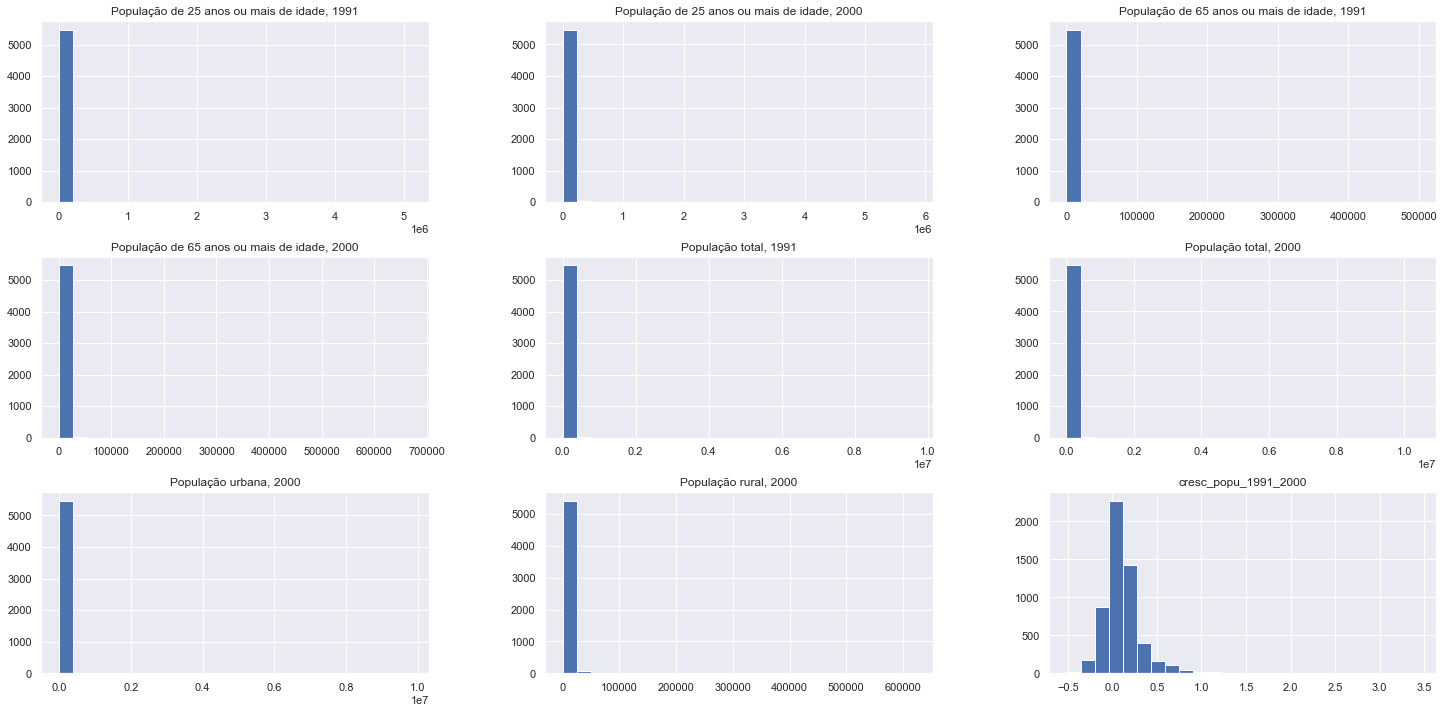

In [25]:
#features de população
df4['População de 25 anos ou mais de idade, 1991']
df4['População de 25 anos ou mais de idade, 2000']
df4['População de 65 anos ou mais de idade, 1991']
df4['População de 65 anos ou mais de idade, 2000']
df4['População total, 1991']
df4['População total, 2000']
df4['População urbana, 2000']
df4['População rural, 2000']
df4['cresc_popu_1991_2000']

df4[['População de 25 anos ou mais de idade, 1991',
    'População de 25 anos ou mais de idade, 2000',
     'População de 65 anos ou mais de idade, 1991',
     'População de 65 anos ou mais de idade, 2000',
     'População total, 1991',
     'População total, 2000',
     'População urbana, 2000',
     'População rural, 2000',
     'cresc_popu_1991_2000' 
     ]].hist(bins = 25);

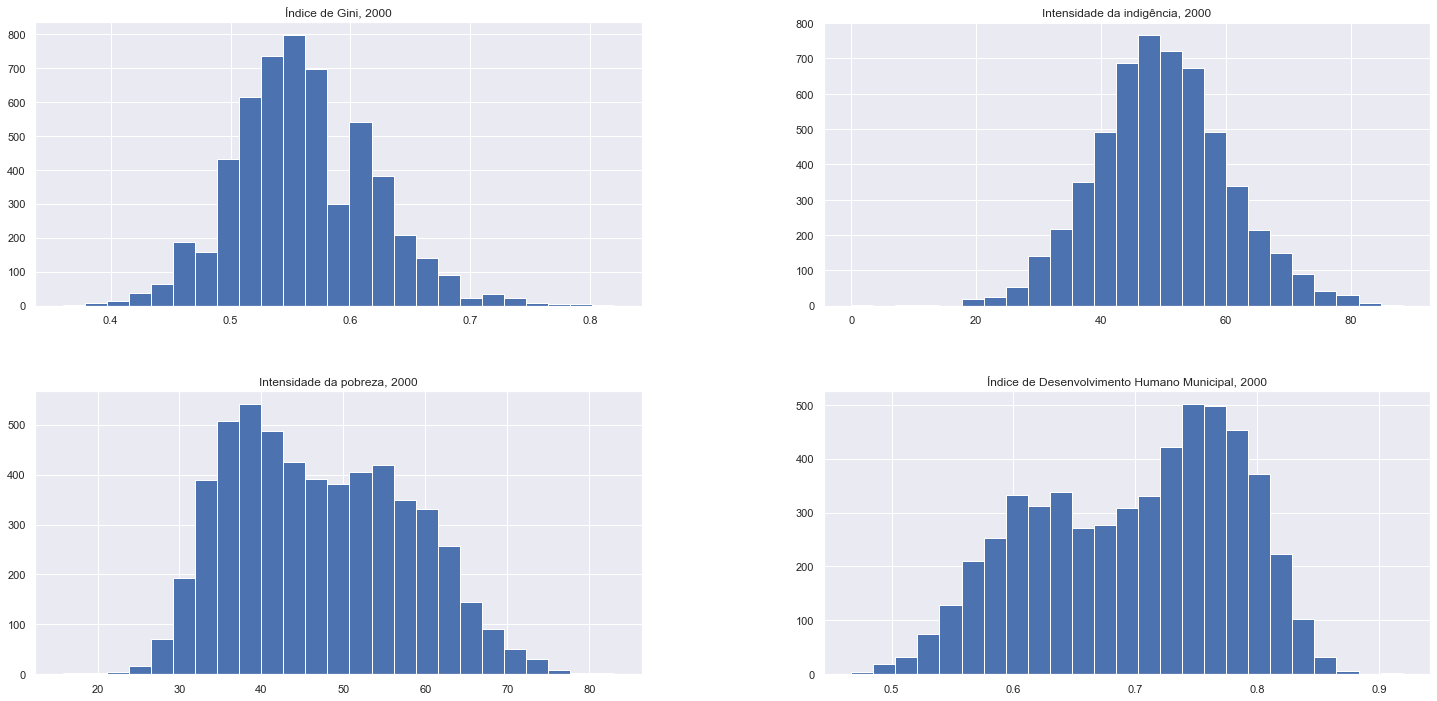

In [26]:
#features de desenvolvimento socio-econômico
df4['Renda per Capita, 2000']
df4['Índice de Gini, 2000']
df4['Intensidade da indigência, 2000']
df4['Intensidade da pobreza, 2000']
df4['Índice de Desenvolvimento Humano Municipal, 2000']

df4[['Índice de Gini, 2000',
     'Intensidade da indigência, 2000','Intensidade da pobreza, 2000',
     'Índice de Desenvolvimento Humano Municipal, 2000'
    ]].hist(bins = 25);

## 4.2 Análise Bivariada

Análise da população total em relação a renda per capita

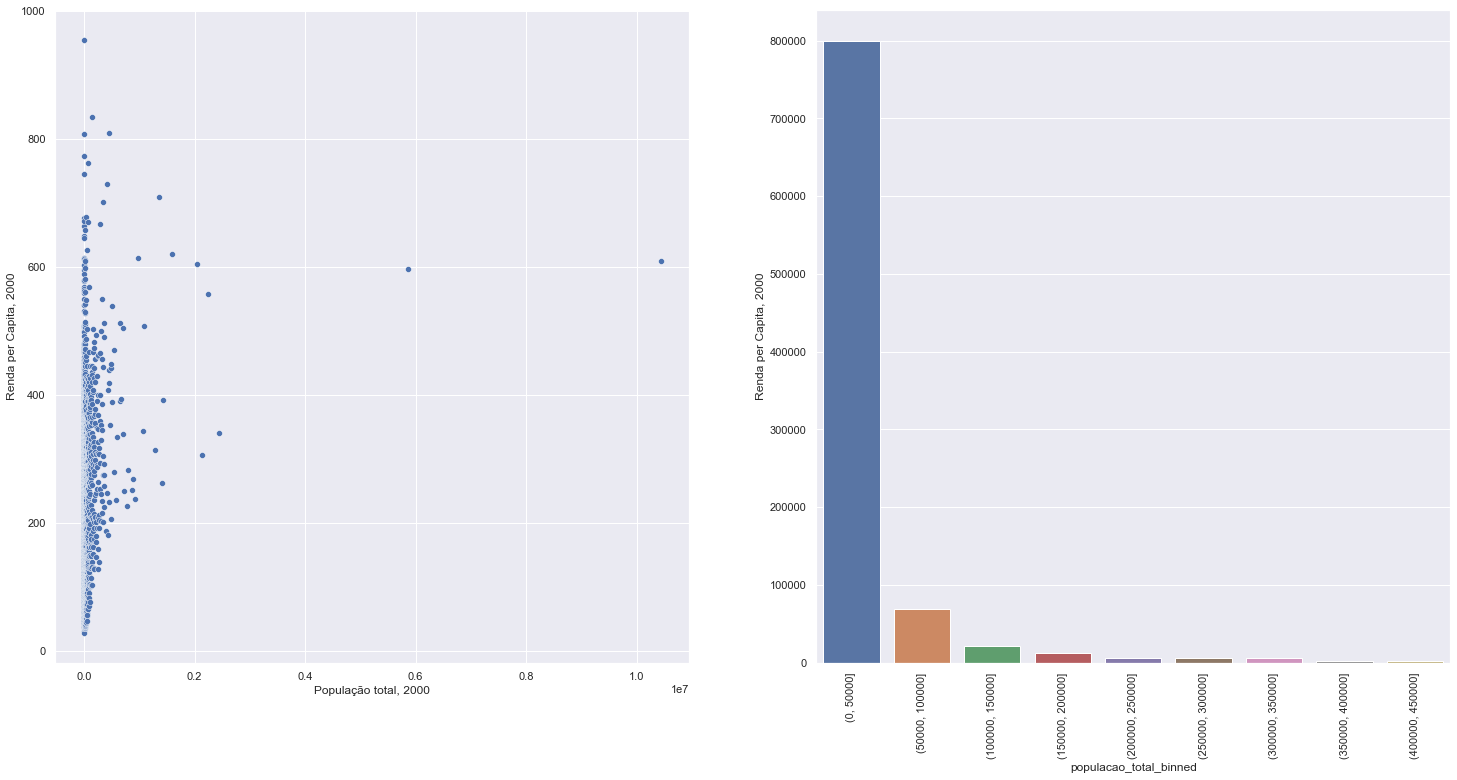

In [27]:
plt.subplot( 1, 2, 1 )
aux1 = df4[['População total, 2000', 'Renda per Capita, 2000']].groupby( 'População total, 2000' ).sum().reset_index()
sns.scatterplot( x ='População total, 2000', y='Renda per Capita, 2000', data=aux1 );


plt.subplot( 1, 2, 2 )
bins = list( np.arange( 0, 500000, 50000) )
aux1['populacao_total_binned'] = pd.cut( aux1['População total, 2000'],bins=bins )
aux2 = aux1[['populacao_total_binned', 'Renda per Capita, 2000']].groupby('populacao_total_binned').sum().reset_index()
sns.barplot( x='populacao_total_binned', y='Renda per Capita, 2000', data=aux2 );
plt.xticks( rotation=90 );

## 4.3 Análise Multivariada

<AxesSubplot:>

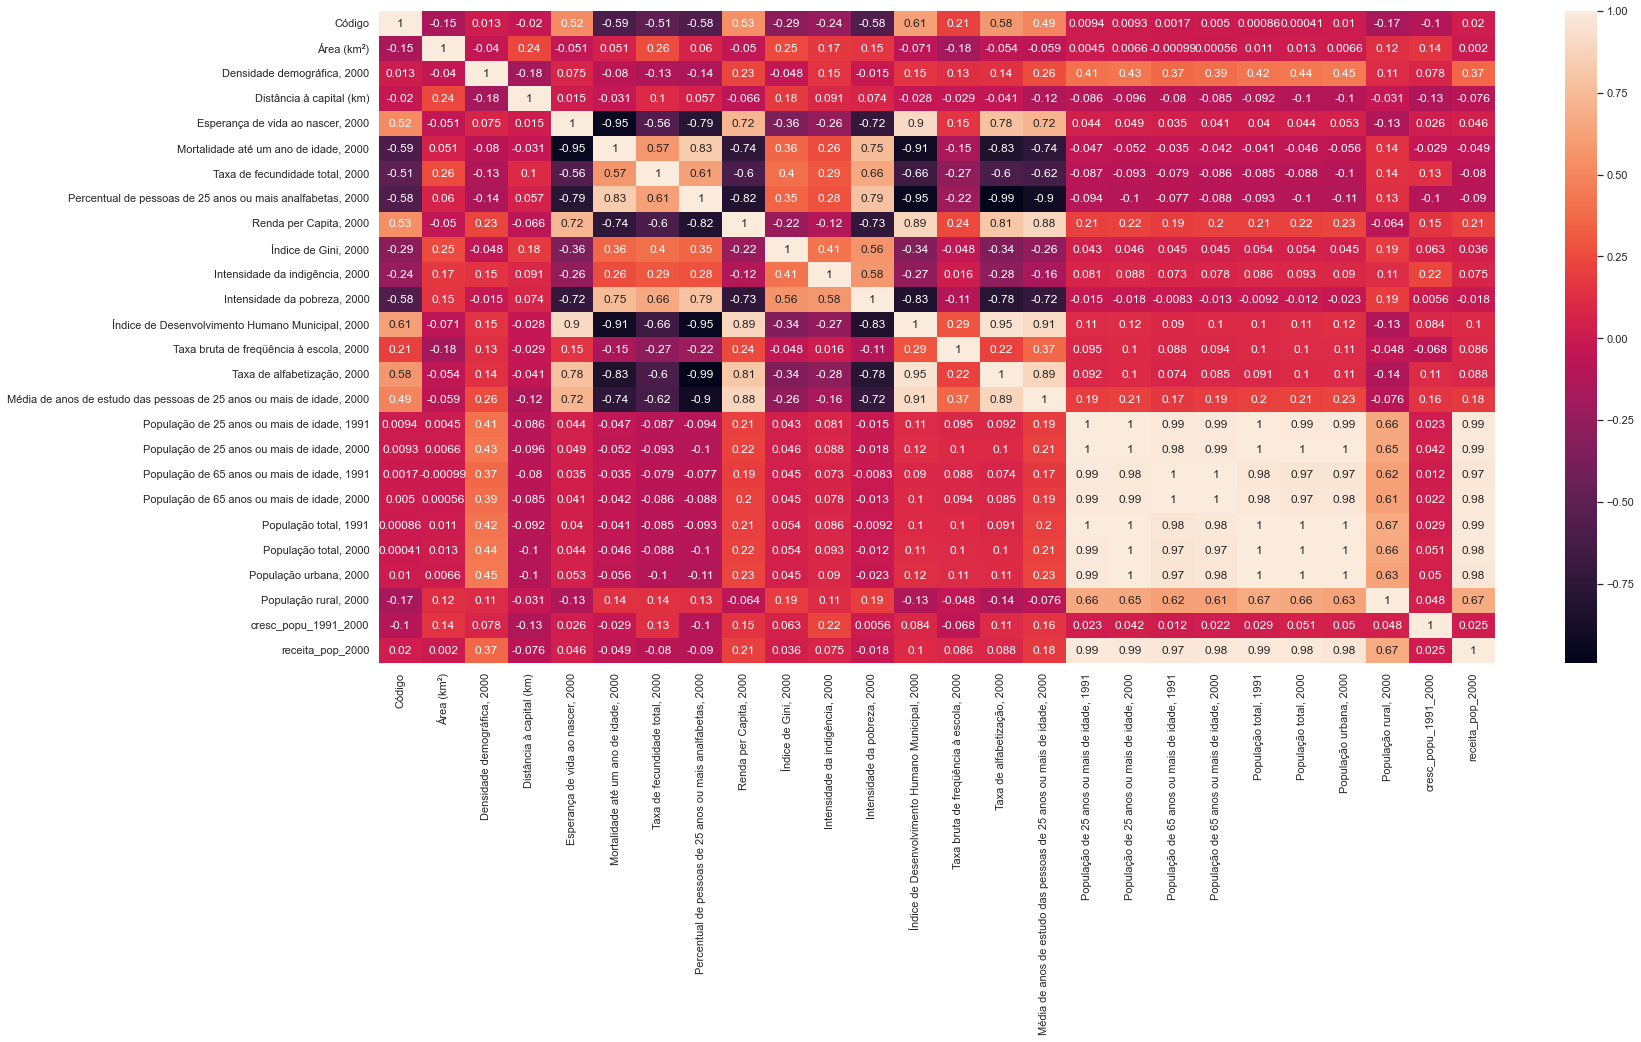

In [28]:
correlacao = df4.corr( method = 'pearson')
sns.heatmap(correlacao, annot = True)

# 5.0 Data Preparation

In [29]:
df5 = df4.copy()

# 6.0 Feature Selection

In [30]:
df6 = df5.copy()

# 7.0 Hyperparameter Fine-Tunning

In [44]:
x = df6.drop( columns=['Código' ] )
x.head()

,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000","Intensidade da indigência, 2000","Intensidade da pobreza, 2000","Índice de Desenvolvimento Humano Municipal, 2000","Taxa bruta de freqüência à escola, 2000","Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",cresc_popu_1991_2000,receita_pop_2000
0,136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,34.40,0.742,80.17,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875,0.176011,1020397.17
1,897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,35.22,0.760,74.57,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519,-0.007086,1265736.56
2,1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,40.32,0.723,74.18,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246,0.218039,1927486.12
3,1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,0.59,44.61,51.04,0.706,81.76,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309,0.191651,12170185.28
4,1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,0.58,41.53,31.68,0.778,78.39,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338,0.080768,5672284.80


In [70]:
# criação dos cluster para avaliar a melhor métrica
clusters = [2, 3, 4, 5, 6]

## 7.1 Within-Cluster Sum of Square (WSS)

In [71]:
wss = []

for k in clusters:
    # model definition
    kmeans = c.KMeans (init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42)
    
    # model training
    kmeans.fit(x)
    
    # validation
    wss.append( kmeans.inertia_ )
    
# plot wss - elbow method
#plt.plot( clusters, wss, linestyle = '--', marker = 'o', color = 'b' )
#plt.xlabel ( 'K')
#plt.ylabel ('Within-Cluster Sum of Square')
#plt.title('WSS vs K' )

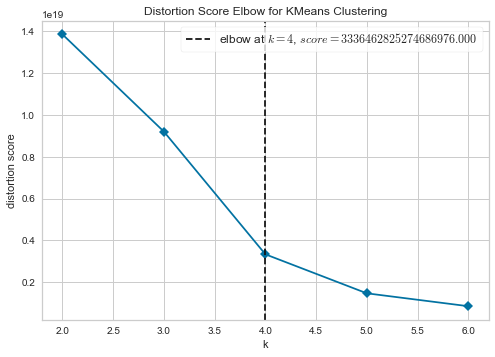

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
#pontos de inflexão: 3, 4 e 5

kmeans = KElbowVisualizer( c.KMeans(), k= clusters, timings = False  )
kmeans.fit(x)
kmeans.show()

In [73]:
wss

[1.3839098196796869e+19,
 7.511302993526094e+18,
 5.594417833531774e+18,
 5.121654584489224e+18,
 4.990329627066598e+18]

## 7.2 Sillhouette Score

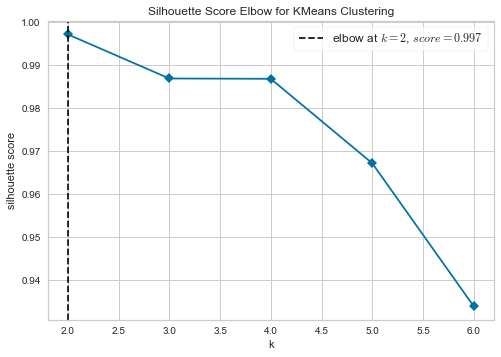

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [76]:
kmeans = KElbowVisualizer( c.KMeans(), k= clusters, metric = 'silhouette', timings = False  )
kmeans.fit(x)
kmeans.show()

# 8.0 Model Training

## 8.1 K-Means

In [80]:
# model definition
k = 6 
kmeans = c.KMeans (init = 'random', n_clusters = k,n_init = 10, max_iter = 300, random_state = 42)

# model training
kmeans.fit( x )

#clustering
labels = kmeans.labels_

## 8.2 Cluster Validation

In [82]:
## WSS (Within-cluster sum of square)
print('WSS vale: {}'.format( kmeans.inertia_) )

## SS (Silhouette Score)
m.silhouette_score(x, labels, metric = 'euclidean')
print('SS vale: {}'.format( m.silhouette_score(x, labels, metric = 'euclidean') ) )

WSS vale: 4.990329627066598e+18
SS vale: 0.8705727436997169


# 9.0 Cluster Analysis

In [106]:
df9 = x.copy()
df9['cluster'] = labels
df9.head()

,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000","Intensidade da indigência, 2000","Intensidade da pobreza, 2000","Índice de Desenvolvimento Humano Municipal, 2000","Taxa bruta de freqüência à escola, 2000","Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",cresc_popu_1991_2000,receita_pop_2000,cluster
0,136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,34.40,0.742,80.17,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875,0.176011,1020397.17,1
1,897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,35.22,0.760,74.57,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519,-0.007086,1265736.56,1
2,1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,40.32,0.723,74.18,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246,0.218039,1927486.12,1
3,1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,0.59,44.61,51.04,0.706,81.76,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309,0.191651,12170185.28,1
4,1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,0.58,41.53,31.68,0.778,78.39,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338,0.080768,5672284.80,1


## 9.1 Visualization Inspection

In [107]:
fig = px.scatter_3d( df9, x = 'População total, 2000', 
                    y = 'Renda per Capita, 2000', 
                    z = 'Índice de Desenvolvimento Humano Municipal, 2000',
                    color = 'cluster')
fig.show()

## 9.2 Cluster Profile

In [108]:
df9.head()

,Área (km²),"Densidade demográfica, 2000",Distância à capital (km),"Esperança de vida ao nascer, 2000","Mortalidade até um ano de idade, 2000","Taxa de fecundidade total, 2000","Percentual de pessoas de 25 anos ou mais analfabetas, 2000","Renda per Capita, 2000","Índice de Gini, 2000","Intensidade da indigência, 2000","Intensidade da pobreza, 2000","Índice de Desenvolvimento Humano Municipal, 2000","Taxa bruta de freqüência à escola, 2000","Taxa de alfabetização, 2000","Média de anos de estudo das pessoas de 25 anos ou mais de idade, 2000","População de 25 anos ou mais de idade, 1991","População de 25 anos ou mais de idade, 2000","População de 65 anos ou mais de idade, 1991","População de 65 anos ou mais de idade, 2000","População total, 1991","População total, 2000","População urbana, 2000","População rural, 2000",cresc_popu_1991_2000,receita_pop_2000,cluster
0,136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,0.53,36.89,34.40,0.742,80.17,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875,0.176011,1020397.17,1
1,897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,0.52,51.90,35.22,0.760,74.57,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519,-0.007086,1265736.56,1
2,1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,0.56,47.06,40.32,0.723,74.18,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246,0.218039,1927486.12,1
3,1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,0.59,44.61,51.04,0.706,81.76,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309,0.191651,12170185.28,1
4,1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,0.58,41.53,31.68,0.778,78.39,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338,0.080768,5672284.80,1


In [129]:
# numero de municipios por cluster
df_cluster1 = df9[['População urbana, 2000', 'cluster']].groupby('cluster').count().reset_index()

# populacao total por cluster
df_cluster2 = df9[['População total, 2000', 'cluster']].groupby('cluster').sum().reset_index()

# porcentagem da populacao por cluster
df_cluster2['perc_populacao'] = 100 * ( df_cluster2['População total, 2000'] /
                                        df_cluster2['População total, 2000'].sum() )                                    


# receita total da populacao
df_cluster3 = df9[['receita_pop_2000', 'cluster']].groupby('cluster').sum().reset_index()

# IDHM
df_cluster4 = df9[['Índice de Desenvolvimento Humano Municipal, 2000',
                   'cluster']].groupby('cluster').mean().reset_index()

# merge dos dataframes
df_cluster = pd.merge( df_cluster1, df_cluster2,how = 'left', on = 'cluster'  )
df_cluster = pd.merge( df_cluster, df_cluster3, how = 'left', on = 'cluster'  )
df_cluster = pd.merge( df_cluster, df_cluster4, how = 'left', on = 'cluster'  )

df_cluster.columns = ['cluster', 'numero_de_municipios', 'População total, 2000', 
                     'perc_populacao, 2000', 'receita_pop_2000', 'IDHM_medio']


# dataframe final
df_cluster

,cluster,numero_de_municipios,"População total, 2000","perc_populacao, 2000",receita_pop_2000,IDHM_medio
0,0,67,18691596,11.008061,6.207014e+09,0.803343
1,1,5135,72808636,42.879265,1.164931e+10,0.692341
2,2,30,19118581,11.259526,7.414705e+09,0.818600
3,3,9,15307394,9.014999,7.640034e+09,0.830667
4,4,264,27580807,16.243193,7.791585e+09,0.789943
5,5,2,16292156,9.594956,9.860430e+09,0.841500


# 10.0 Deploy to Production